# Introduction

The goal of this notebook is to present a preview of the dataset, describe each property compare with the official data from Danmark Statistik. In the end, a few possible questions are included, opening the discussion of what the focus should be (and how to visualize it).

In [2]:
import pandas as pd
import matplotlib
from scipy.stats.stats import pearsonr

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle code view."></form>''')

In [4]:
# jobindex
df = pd.read_csv('../data/jobindex_2021.csv', engine='python')

# danmark statistik - job vacancies by quarter
df_ds = pd.read_csv('../data/dstatistik2.csv', header=None)
df_ds.columns = ['quarter', 'count']

In [5]:
# drop duplicates from jobindex dataset
df_no_dup = df.drop_duplicates(subset=df.columns[1:])

df_no_dup['date'] = pd.to_datetime(df_no_dup['date'])

# group counts by type
df_count = df_no_dup[['type', 'date']].groupby('date').count().reset_index()

# filter only from 2010 upwards
df_filtered = df_count[(df_count['date'] >= '2010-01-01') & (df_count['date'] <= '2020-12-31')]

# organize df_jobindex by quarter
df_ji = df_filtered.resample('Q', convention='end', on='date').agg('sum').reset_index()

# Preview

In [6]:
df.head()

,id,title,company,location,description,source,date,company_rating,type,description_img,company_rating_amount,ratings_link,link
0,1,Bo- og Aflastningstilbuddet Tankefuld søger ak...,Svendborg Kommune,Svendborg,Vi søger timelønnede medarbejdere - både u...,Jobcenter,2021-03-04,NaN,unpaid,NaN,NaN,NaN,/bruger/dine-job/r9423946/gem
1,2,Billigblomst Aalborg søger kasseassistent,BilligBlomst Aalborg ApS,Aalborg SV,Har du solid erfaringen indenfor butiksver...,Jobcenter,2021-03-04,NaN,unpaid,NaN,NaN,NaN,/bruger/dine-job/r9423932/gem
2,3,Billigblomst Næstved søger to kompetente kasse...,BilligBlomst Næstved ApS,Holmegaard,Har du solid erfaringen indenfor butiksver...,Jobcenter,2021-03-04,NaN,unpaid,NaN,NaN,NaN,/bruger/dine-job/r9423979/gem
3,4,BILLIGBOMST RANDERS SØGER BUTIKSASSISTENTER,BilligBlomst Randers ApS,Randers SØ,Billigblomst søger 2 nye medarbejdere til ...,Jobcenter,2021-03-04,NaN,unpaid,NaN,NaN,NaN,/bruger/dine-job/r9424458/gem
4,5,Studentermedarbejder,Dansk Firmaidrætsforbund,Nyborg,NaN,Dansk Firmaidrætsforbund,2021-03-04,NaN,unpaid,NaN,NaN,NaN,/bruger/dine-job/r9423600/gem


## Description

* __title__: Title of the job
* __company__: Company
* __location__: Location
* __source__: the original poster of the job
* __date__: date of the job posting
* __company_rating__: rating by jobindex.dk's users, to the given company
* __type__: can be "paid" or "unpaid". Jobindex allows for paid ads (thus bumping them to the top of the page)
* __description_img__: some job postings include images
* __company_rating_amount__: number of users who have rated the company
* __ratings_link__: when ratings are available, it's possible to see more details (like comments) when click the link
* __link__: link to the original job posting

## Limitations of the jobindex.dk dataset

- Not all job postings have titles and/or company and/location. This is because of the HTML, that makes it somewhat hard to scrape the information properly.
- Some job postings might have a title in the "company" column. Again, HTML-related.
- Big dip in data, around 2014. Something I

# Visualization

Text(0.5, 0, 'year (by quarter)')

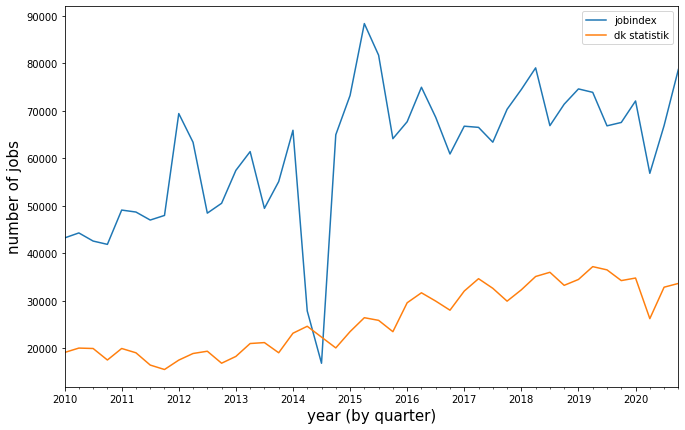

In [7]:
df_combined = pd.DataFrame()

df_combined['date'] = df_ji['date']
df_combined['jobindex'] = df_ji['type']
df_combined['dk statistik'] = df_ds['count']

ax =df_combined.set_index('date').plot(figsize=(11,7))
ax.set_ylabel("number of jobs", fontsize=15)
ax.set_xlabel("year (by quarter)", fontsize=15)

# Correlation

In [8]:
x = df_ji['type'].values
y = df_ds['count'].values

corr = pearsonr(x,y)

print("Correlation (Pearson):", "{:.1%}".format(corr[0]))
print("""
This means that, even with the missing data in 2014-Q2, the correlation is strong.
It will be stronger when the missing data issue has been solved.

In practical terms, it means that the jobindex dataset is highly correlated with 
the official government data for "job vacancies", thus increasing its reliability. 

""")

Correlation (Pearson): 60.6%

This means that, even with the missing data in 2014-Q2, the correlation is strong.
It will be stronger when the missing data issue has been solved.

In practical terms, it means that the jobindex dataset is highly correlated with 
the official government data for "job vacancies", thus increasing its reliability. 




# Potential questions

## Potential questions:

### Regarding job numbers:

- n jobs per title;

- n jobs per company;

- n jobs by location;

- n jobs per source of job ad (where can we find more jobs?)

- n jobs per title per source of job ad;

- n jobs by date;

- n jobs by date by title;

- n jobs by date by company;

- n of jobs by date by title by company;

- n jobs per month;

- n jobs by quarter/season;

- n jobs by month/quarter/season by title;

- n jobs per month by company;

### Regarding words

- Most common words per description